Why do certain hours with low user activity generate disproportionately high revenue? 

Hypothesis 1: High-value products are purchased during these hours 

Hypothesis 2: There could be targeted promotions or sales during these hours

Hypothesis 3: Repeat customers drive revenue during these hours 

In [ ]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [ ]:
#Load Dataset

df = pd.read_csv("../data/cleaned/cleaned_data.csv", parse_dates=['event_time'])
df = df.sample(n=50000, random_state=5)
warnings.filterwarnings('ignore')

In [23]:
# Hypothesis 1 

# Load and preprocess the data
df['event_time'] = pd.to_datetime(df['event_time'])
purchases = df[df['event_type'] == 'purchase']

purchases['hour'] = purchases['event_time'].dt.hour

#Defining the low and high activity hours 
low_activity_hours = range(4, 9)
high_activity_hours = range(9, 24)

# Split the data by activity levels
low_activity_purchases = purchases[purchases['hour'].isin(low_activity_hours)]
high_activity_purchases = purchases[purchases['hour'].isin(high_activity_hours)]

#Calculate average and median transaction values
low_activity_stats = low_activity_purchases['price'].agg(['mean', 'median'])
high_activity_stats = high_activity_purchases['price'].agg(['mean', 'median'])

print("Low Activity Hours Stats (Mean, Median):")
print(low_activity_stats)
print("\nHigh Activity Hours Stats (Mean, Median):")
print(high_activity_stats)

Low Activity Hours Stats (Mean, Median):
mean      347.998499
median    230.130000
Name: price, dtype: float64

High Activity Hours Stats (Mean, Median):
mean      376.211022
median    243.085000
Name: price, dtype: float64


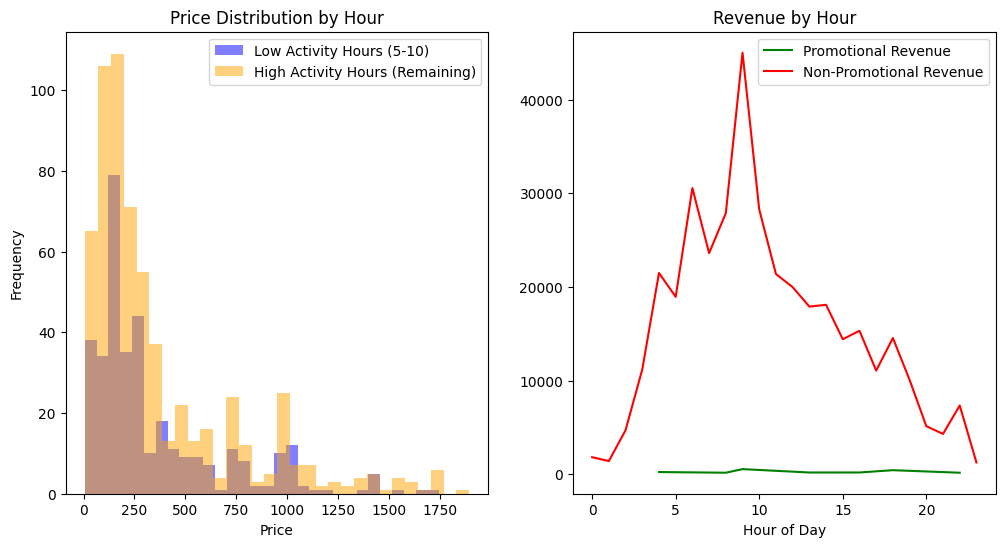

In [29]:
# Hypothesis 2 Part 1

# Create a plot to look at price distribution by hour based on low-activity and high-activity hours 
df['event_time'] - pd.to_datetime(df['event_time'])
purchases = df[df['event_type'] == 'purchase']
purchases['hour'] = purchases['event_time'].dt.hour
low_activity_hours = range(4,9)
high_activity_hours = range(9,24)
plt.figure(figsize=(12,6))

# Create Plot for price distribution
plt.subplot(1,2,1)
plt.hist(purchases[purchases['hour'].isin(low_activity_hours)]['price'], bins=30, alpha=0.5, label='Low Activity Hours (5-10)', color='blue')
plt.hist(purchases[purchases['hour'].isin(high_activity_hours)]['price'], bins=30, alpha=0.5, label='High Activity Hours (Remaining)', color='orange')
plt.title('Price Distribution by Hour')
plt.xlabel('Price')
plt.ylabel("Frequency")
plt.legend()

# Try to identify price drops of up to 10% as potential promotions
purchases['price_drop'] = purchases.groupby('product_id')['price'].transform('min') / purchases['price'] < 0.9
plt.subplot(1,2,2)
promo_revenue = purchases[purchases['price_drop']].groupby('hour')['price'].sum()
non_promo_revenue = purchases[~purchases['price_drop']].groupby('hour')['price'].sum()

# Create plot for promotional vs non-promotional purchases
plt.plot(promo_revenue.index, promo_revenue, label='Promotional Revenue', color='green')
plt.plot(non_promo_revenue.index, non_promo_revenue, label='Non-Promotional Revenue', color='red')
plt.title('Revenue by Hour')
plt.xlabel('Hour of Day')
plt.legend()

plt.tight_layout
plt.show()

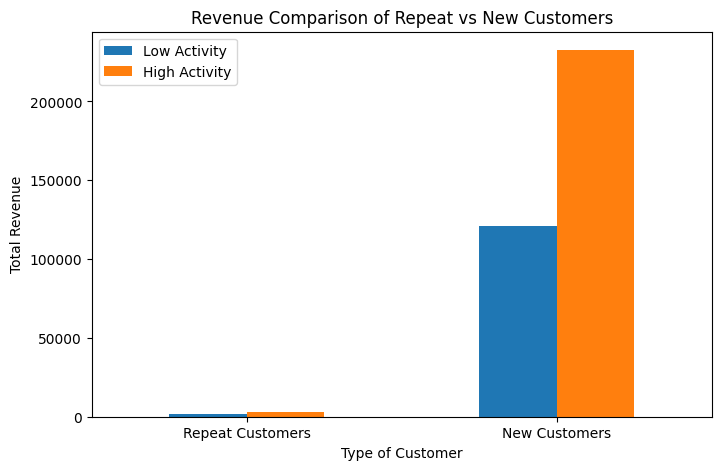

In [ ]:
# Hypothesis 3

#Create plot to analyze the revenue of new customers vs repeat customers based on high-activity and low-activity hours
df['event_time'] = pd.to_datetime(df['event_time'])
purchases = df[df['event_type'] == 'purchase']
purchases['hour'] = purchases['event_time'].dt.hour

low_activity_hours = range(4,9)
high_activity_hours = range(9,24)

# Identify repeat customers
repeat_customers = purchases.groupby('user_id').filter(lambda x: len(x) > 1)

repeat_low = purchases[(purchases['hour'].isin(low_activity_hours)) & (purchases['user_id'].isin(repeat_customers['user_id']))]
new_low = purchases[(purchases['hour'].isin(low_activity_hours)) & (~purchases['user_id'].isin(repeat_customers['user_id']))]
repeat_high = purchases[(purchases['hour'].isin(high_activity_hours)) & (purchases['user_id'].isin(repeat_customers['user_id']))]
new_high = purchases[(purchases['hour'].isin(high_activity_hours)) & (~purchases['user_id'].isin(repeat_customers['user_id']))]

revenue = {
    'Low Activity': [repeat_low['price'].sum(), new_low['price'].sum()],
    'High Activity': [repeat_high['price'].sum(), new_high['price'].sum()]
}

revenue_df = pd.DataFrame(revenue, index=['Repeat Customers', 'New Customers'])

#Create Plot
revenue_df.plot(kind='bar', figsize=(8,5))
plt.title('Revenue Comparison of Repeat vs New Customers')
plt.ylabel("Total Revenue")
plt.xlabel("Type of Customer")
plt.xticks(rotation = 0)
plt.show()

Findings and Observations (Mirza Baig)

After testing all 3 of the hypotheses, they each gave me an outcome that directly answered the question that was asked. For the first hypothesis, I wanted to test and see if high-value products were being purchased within the low-activity hours. I did this by looking at the mean and median of product prices sold during the low and high-activity hours. My findings indicated that the mean and median of the product prices sold were lower in the low-activity periods as compared to the higher prices sold during high-activity hours. My second hypothesis was to see if there could be targeted promotions or sales during the low-activity hours. I tested this hypothesis by creating two plots. One for looking at the price distribution based on the low-activity and high-activity hours. The second plot was a plot that I created by looking to see if there was a 10% or more price drop on any products within the low-activity hours and comparing the revenue of the low and high-activity hours based on those price-dropped products. From the first plot, I observed that during the low-activity hours, there were a lot more low-priced products that were being sold as compared to the high-activity hours. One thing this could indicate is that there are larger amounts of products purchased by individual users as compared to high activity where there may be singular or no bulk purchases being made. The other plot that I made which was based on the 10% price drop, there were little to no promotions being applied to the products during this time which disproves the hypothesis. The last hypothesis that I tested was to see if repeat customers drove the revenue during the low-activity hours. I made a plot to see the revenue comparison of repeat vs new customers during the low-activity and high-activity hours. This plot indicated to me that, new customers drive a lot more profit during the low-activity hours rather than repeat customers. This could indicate that customers spend a lot more on their first or initial purchases or there could be some marketing that is bringing in new potential customers. Based on the three hypotheses that I tested, they were all disproved by the plots and statistics that I came up with. However, testing these hypotheses gave me new insights into what could be potentially causing this observation. 